## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


## Loading the Data

In [23]:

df = pd.read_csv("CAR DETAILS.csv")


## Cleaning the Data

In [9]:

# Step 1: Load the data
data = df

df = pd.DataFrame(data)

# Step 2: Check for missing values
missing_values = df.isnull().sum()

# Step 3: Check and convert data types if necessary
data_types = df.dtypes

# Step 4: Identify outliers in numerical columns
# For simplicity, we will use the IQR method for outlier detection
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['selling_price'] < (Q1 - 1.5 * IQR)) | (df['selling_price'] > (Q3 + 1.5 * IQR))

# Step 5: Check consistency of categorical values
unique_fuels = df['fuel'].unique()
unique_seller_types = df['seller_type'].unique()
unique_owners = df['owner'].unique()

# Step 6: Remove duplicates
duplicates = df.duplicated().sum()

# Display the results
missing_values, data_types, outlier_condition, unique_fuels, unique_seller_types, unique_owners, duplicates


(name             0
 year             0
 selling_price    0
 km_driven        0
 fuel             0
 seller_type      0
 transmission     0
 owner            0
 dtype: int64,
 name             object
 year              int64
 selling_price     int64
 km_driven         int64
 fuel             object
 seller_type      object
 transmission     object
 owner            object
 dtype: object,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 4335    False
 4336    False
 4337    False
 4338    False
 4339    False
 Name: selling_price, Length: 4340, dtype: bool,
 array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object),
 array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
        'Third Owner', 'Test Drive Car'], dtype=object),
 np.int64(763))

## Explorotary Data Analysis

C:\Users\Srimanth Madira\AppData\Local\Temp\ipykernel_29824\230272957.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_counts.index, y=car_counts.values, palette='viridis')


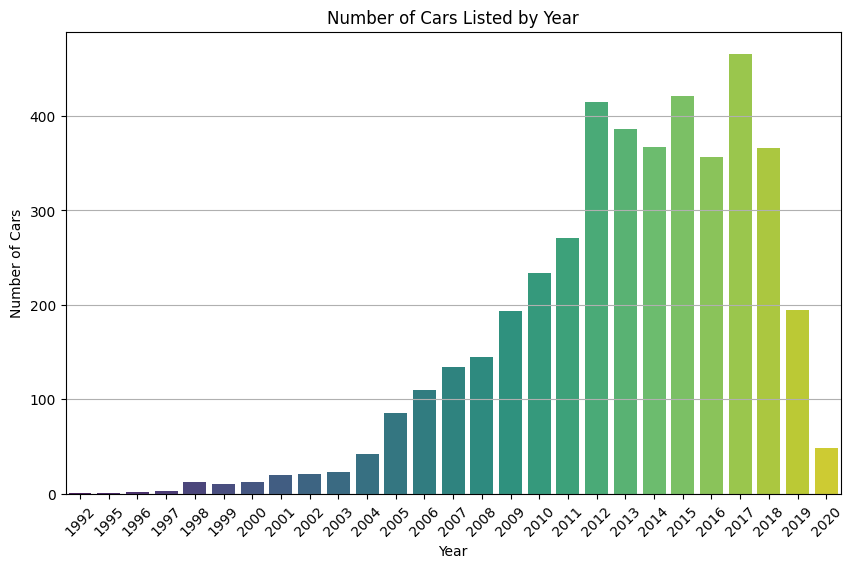

Number of cars listed by year:
year
1992      1
1995      1
1996      2
1997      3
1998     12
1999     10
2000     12
2001     20
2002     21
2003     23
2004     42
2005     85
2006    110
2007    134
2008    145
2009    193
2010    234
2011    271
2012    415
2013    386
2014    367
2015    421
2016    357
2017    466
2018    366
2019    195
2020     48
Name: count, dtype: int64


In [10]:

# Set up the data again (if necessary)
data =df


df = pd.DataFrame(data)

# Step 1: Count the number of cars per year
car_counts = df['year'].value_counts().sort_index()

# Step 2: Visualize the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=car_counts.index, y=car_counts.values, palette='viridis')
plt.title('Number of Cars Listed by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Display the counts
print("Number of cars listed by year:")
print(car_counts)


C:\Users\Srimanth Madira\AppData\Local\Temp\ipykernel_29824\312466053.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cars.values, y=top_5_cars.index, palette='viridis')


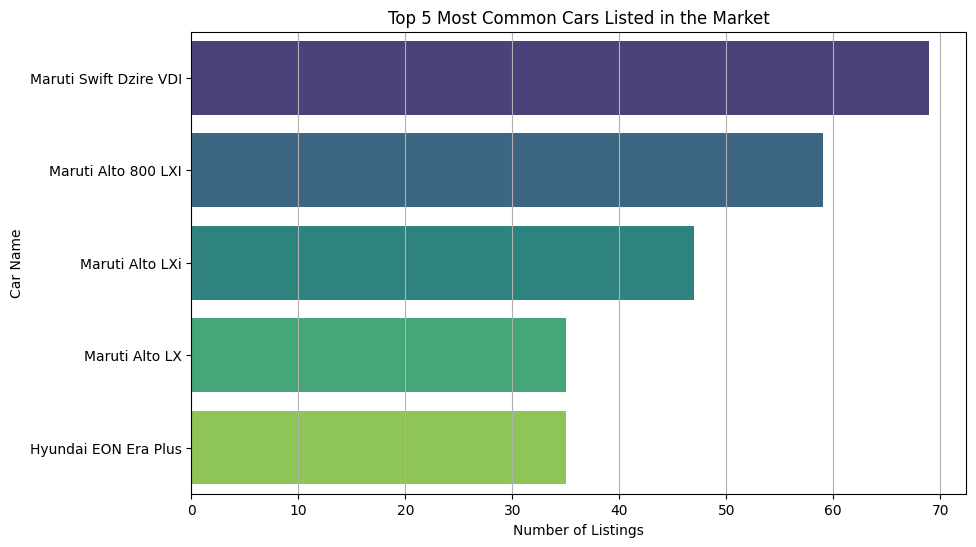

Number of listings for the top 5 cars:
name
Maruti Swift Dzire VDI    69
Maruti Alto 800 LXI       59
Maruti Alto LXi           47
Maruti Alto LX            35
Hyundai EON Era Plus      35
Name: count, dtype: int64


In [11]:

# Sample DataFrame setup (as per your previous data)
data =df
df = pd.DataFrame(data)

# Step 1: Count the occurrences of each car name
car_counts = df['name'].value_counts()

# Step 2: Get the top 5 cars
top_5_cars = car_counts.head(5)

# Step 3: Visualize the top 5 cars
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cars.values, y=top_5_cars.index, palette='viridis')
plt.title('Top 5 Most Common Cars Listed in the Market')
plt.xlabel('Number of Listings')
plt.ylabel('Car Name')
plt.grid(axis='x')
plt.show()

# Display the counts of the top 5 cars
print("Number of listings for the top 5 cars:")
print(top_5_cars)


C:\Users\Srimanth Madira\AppData\Local\Temp\ipykernel_29824\588874285.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='owner', data=df, palette='viridis')


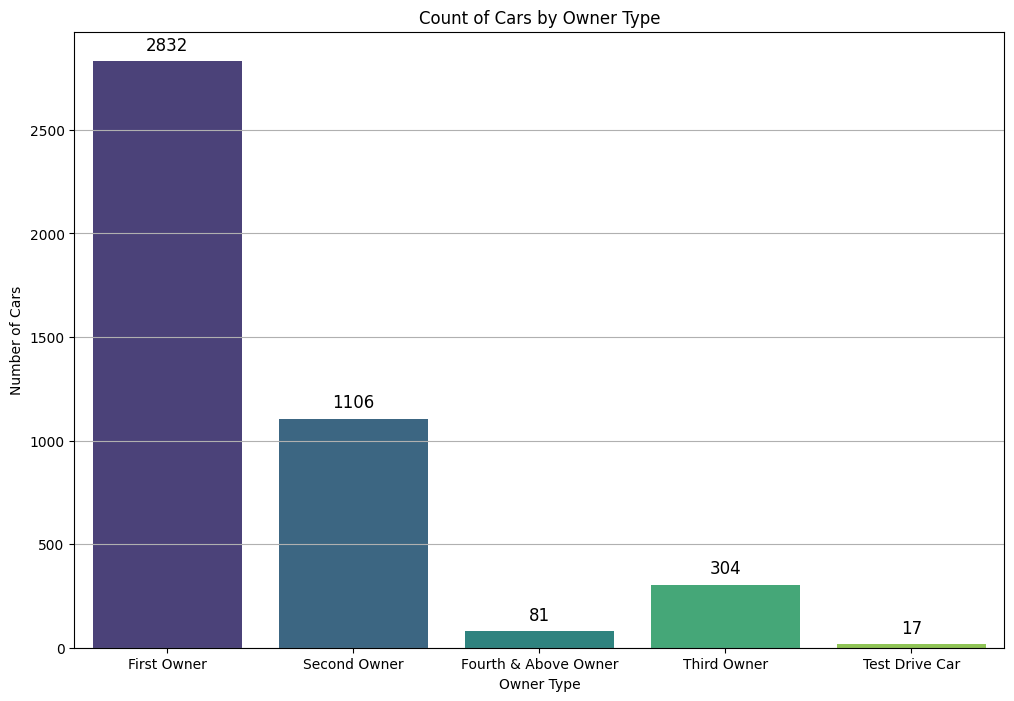

Number of cars for each owner type:
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [12]:


# Sample DataFrame setup (as per your previous data)
data =df
df = pd.DataFrame(data)

# Step 1: Count the occurrences of each owner type
owner_counts = df['owner'].value_counts()

# Step 2: Visualize the owner types
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='owner', data=df, palette='viridis')
plt.title('Count of Cars by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Number of Cars')
plt.grid(axis='y')

# Step 3: Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

# Display the counts
print("Number of cars for each owner type:")
print(owner_counts)


C:\Users\Srimanth Madira\AppData\Local\Temp\ipykernel_29824\481812395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='fuel', data=df, palette='viridis')


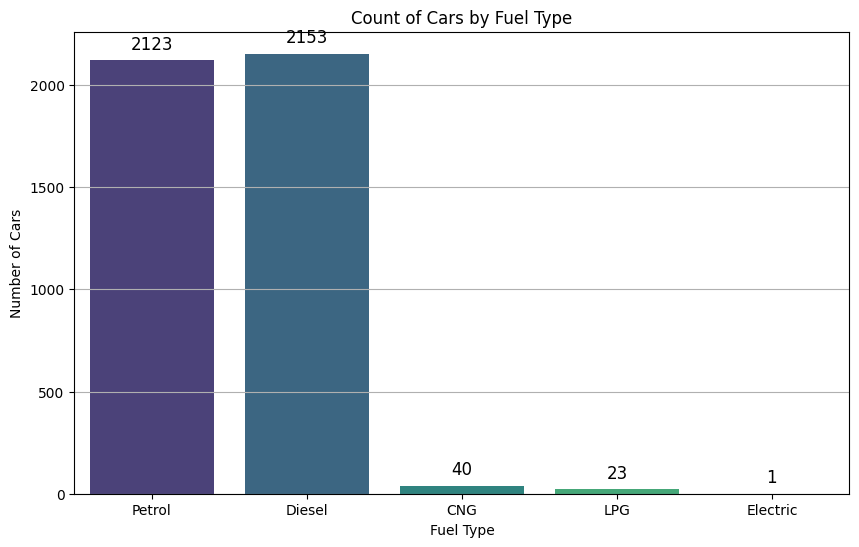

In [13]:
# Count of Cars by Fuel Type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='fuel', data=df, palette='viridis')
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.grid(axis='y')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()



Average Selling Price by Owner Type

C:\Users\Srimanth Madira\AppData\Local\Temp\ipykernel_29824\3255955383.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='owner', y='selling_price_usd', data=avg_price_owner, palette='viridis')


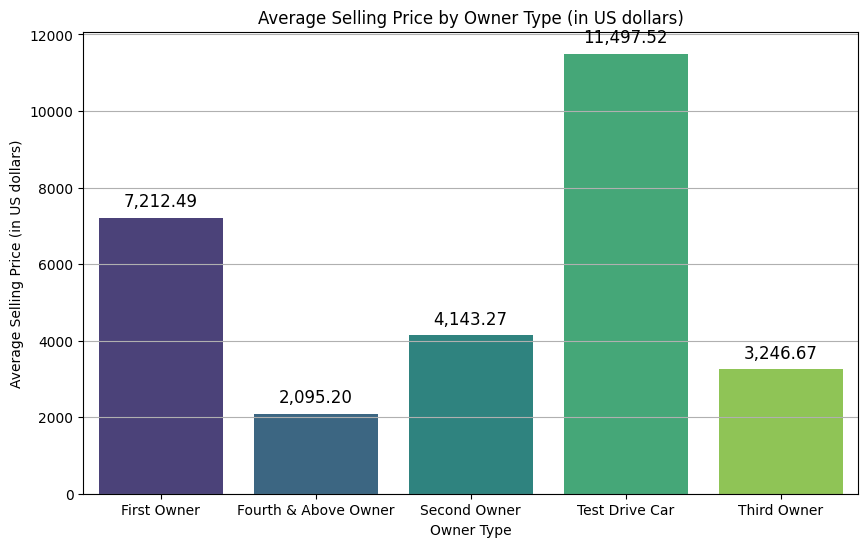

In [14]:
# Average Selling Price by Owner Type
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame setup (as per your previous data)
data = df
df = pd.DataFrame(data)

# Convert selling price to US dollars by dividing by 83
df['selling_price_usd'] = df['selling_price'] / 83

# Average Selling Price by Owner Type
plt.figure(figsize=(10, 6))
avg_price_owner = df.groupby('owner')['selling_price_usd'].mean().reset_index()
ax = sns.barplot(x='owner', y='selling_price_usd', data=avg_price_owner, palette='viridis')
plt.title('Average Selling Price by Owner Type (in US dollars)')
plt.xlabel('Owner Type')
plt.ylabel('Average Selling Price (in US dollars)')
plt.grid(axis='y')

# Annotate the bars with their average selling prices
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()




Count of Cars by Transmission Type

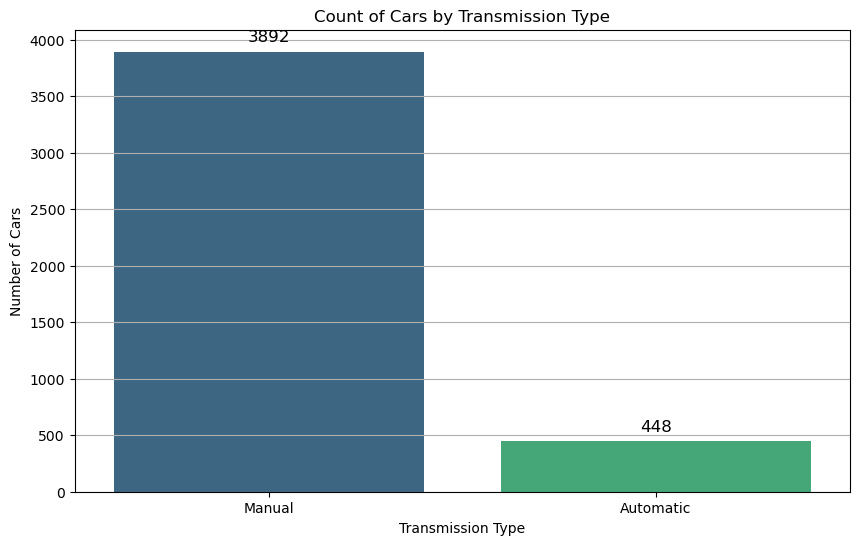

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Cars by Transmission Type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='transmission', data=df, palette='viridis')
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.grid(axis='y')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()


Feature Importance and Model Selection

In [16]:
from sklearn.preprocessing import LabelEncoder

Model Training and Hyperparameter Tuning

In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['seller_type']  # Replace this with your actual column names

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [18]:
categorical_columns = ['seller_type']  # Replace with actual column names in your DataFrame


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


df = pd.DataFrame(data)

X = df.drop(['selling_price', 'name'], axis=1)  # Dropping 'name' as it's irrelevant for prediction
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numerical_features = ['year', 'km_driven']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared Score: {r2}")

new_car = pd.DataFrame({
    'year': [2015],
    'km_driven': [50000],
    'fuel': ['Diesel'],
    'seller_type': ['Individual'],
    'transmission': ['Manual'],
    'owner': ['First Owner']
})

predicted_price = model.predict(new_car)
print(f"Predicted Selling Price: {predicted_price[0] // 84}")


R-squared Score: 0.5205943564530833
Predicted Selling Price: 6365.0


                         Feature  Importance
1                      km_driven    0.289318
0                           year    0.197992
10        transmission_Automatic    0.169866
11           transmission_Manual    0.122209
3                    fuel_Diesel    0.121911
7             seller_type_Dealer    0.026842
8         seller_type_Individual    0.022362
6                    fuel_Petrol    0.022144
14            owner_Second Owner    0.011609
12             owner_First Owner    0.008335
9   seller_type_Trustmark Dealer    0.004166
16             owner_Third Owner    0.002236
15          owner_Test Drive Car    0.000552
13    owner_Fourth & Above Owner    0.000373
2                       fuel_CNG    0.000071
5                       fuel_LPG    0.000014
4                  fuel_Electric    0.000002


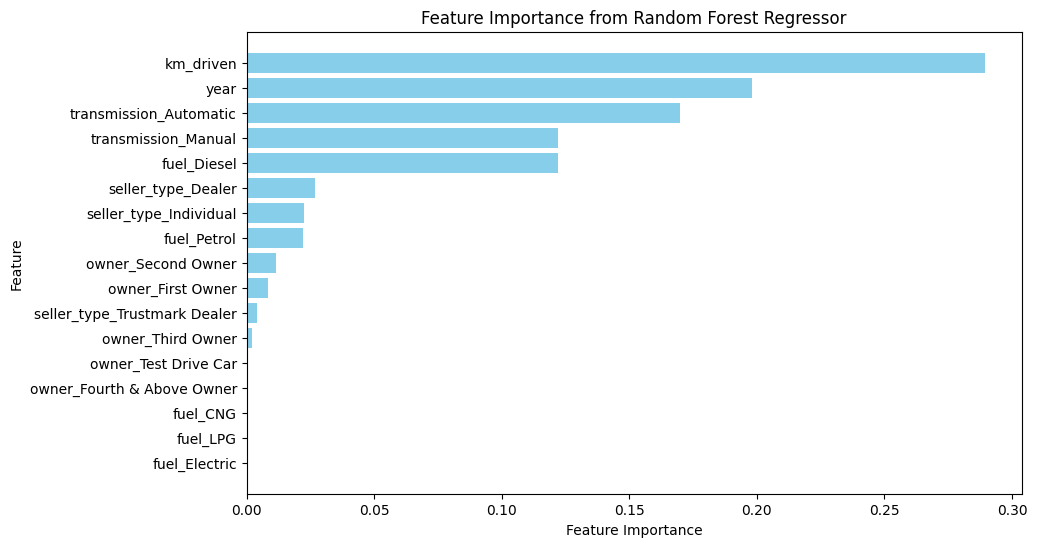

In [ ]:
import matplotlib.pyplot as plt

regressor = model.named_steps['regressor']

categorical_transformer = model.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names = categorical_transformer.get_feature_names_out(categorical_features)

all_feature_names = numerical_features + list(categorical_feature_names)

feature_importances = regressor.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Regressor')
plt.show()

In [38]:
# Next Steps
# improving accuracy of the model
# Regression Enhancement using Feature importance score 
# Making it interactive to user to enter the car details